<a href="https://colab.research.google.com/github/Eliandry/Neural-networks/blob/main/guessEmotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import os
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D,BatchNormalization
from google.colab import files
from PIL import Image
from keras.applications import vgg19
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [198]:
x_train=[]
y_train=[]
for i in range(26):
  img = Image.open(f'/content/tAngry/1 ({i+1}).jpg')
  img=np.array(img)
  x_img=vgg19.preprocess_input(np.expand_dims(img,axis=0))
  x_img.shape=(48,48,1)
  x_train.append(x_img)
  y_train.append(0)

for i in range(35):
  img = Image.open(f'/content/tHappy/2 ({i+1}).jpg')
  img=np.array(img)
  x_img=vgg19.preprocess_input(np.expand_dims(img,axis=0))
  x_img.shape=(48,48,1)
  x_train.append(x_img)
  y_train.append(1)

print(x_train[0].shape)
print(y_train)


(48, 48, 1)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [199]:
#y_train=to_categorical(y_train,4)
x_train=np.expand_dims(x_train,axis=3)
x_train=x_train.reshape(x_train.shape[0], 48, 48, 1)
x=x_train/255
y_train=to_categorical(y_train,2)

In [200]:
num_features = 64
num_labels = 2
batch_size = 64
epochs = 100
width, height = 48, 48

In [201]:
model = keras.Sequential()
if 1==1:
    model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
    model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(2*2*2*num_features, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2*2*num_features, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2*num_features, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation='softmax'))

In [194]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_77 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_77 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_78 (Batc (None, 23, 23, 128)     

In [202]:
model.compile(loss="binary_crossentropy",
                  optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
                  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [228]:
print(y_train[1])
model.fit(np.array(x), np.array(y_train),
              batch_size=batch_size,
              epochs=100,
              verbose=1)

[1. 0.]
Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.8385 - accuracy: 0.6557
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 0.8146 - accuracy: 0.6721
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 0.7960 - accuracy: 0.6721
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 0.7381 - accuracy: 0.6885
Epoch 5/100
1/1 [==============================] - 4s 4s/step - loss: 0.6820 - accuracy: 0.6885
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 0.8799 - accuracy: 0.5902
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 0.8493 - accuracy: 0.6393
Epoch 8/100
1/1 [==============================] - 4s 4s/step - loss: 0.7030 - accuracy: 0.7377
Epoch 9/100
1/1 [==============================] - 4s 4s/step - loss: 0.6760 - accuracy: 0.7705
Epoch 10/100
1/1 [==============================] - 4s 4s/step - loss: 0.6428 - accuracy: 0.7213
Epoch 11/100
1/1 [=============

array([[0., 1.]], dtype=float32)

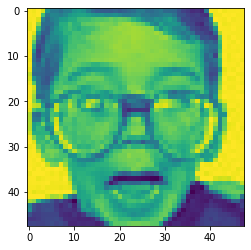

In [234]:
imgs = Image.open(f'/content/tAngry/1 (12).jpg')
plt.imshow(imgs)
x_img=vgg19.preprocess_input(np.expand_dims(imgs,axis=0))
x_img.shape=(x_img.shape[0],48,48,1)
model.predict(np.array(x_img))